In [7]:
#Using the 'coinmarket' API to collect data

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'99',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9861f003-77f7-4b5e-805d-c0d9b1609fbe',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
  print('API WOKRED')

except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

API WOKRED


In [2]:
#Displaying all the columns and rows instead of the head and bottom

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Adding a 'timstamp' data using according to the user

import pandas as pd

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931844e+07,1.931844e+07,NaN,1,NaN,NaN,None,2023-03-15T18:34:00.000Z,24445.001561,4.949890e+10,1.4973,0.493151,-4.388362,11.180819,13.022895,18.079575,40.418754,4.722394e+11,44.4295,5.133450e+11,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
1,1027,Ethereum,ETH,ethereum,6579,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-15T18:34:00.000Z,1641.958594,1.419322e+10,-2.0721,0.648097,-6.503096,5.852737,10.528765,7.438913,29.270719,2.009328e+11,18.9043,2.009328e+11,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
2,825,Tether,USDT,tether,49437,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.339871e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-03-15T18:34:00.000Z,1.002145,6.977311e+10,4.7810,0.014970,-0.016083,0.214963,0.119636,0.198681,0.208454,7.355618e+10,6.9228,7.329869e+10,None,2023-03-15T18:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 21:36:07.835756
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578920e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-15T18:34:00.000Z,305.611094,6.923789e+08,-12.5682,0.655790,-3.482924,5.291806,5.898263,0.940387,17.190915,4.825354e+10,4.5398,4.889165e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
4,3408,USD Coin,USDC,usd-coin,10756,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.754065e+10,3.754065e+10,NaN,5,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.999501,8.160363e+09,21.2394,0.008510,0.041867,-0.034421,-0.059399,-0.045769,-0.043101,3.752192e+10,3.5302,3.752192e+10,None,2023-03-15T18:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 21:36:07.835756
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.361813,1.228764e+09,-11.6947,0.372788,-5.340651,-7.785326,-1.711869,-7.679372,-4.514566,1.843469e+10,1.7344,3.618127e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
6,2010,Cardano,ADA,cardano,678,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.470417e+10,3.557370e+10,NaN,7,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.325285,6.523589e+08,25.6539,1.207301,-9.537751,1.340567,-7.407279,-6.973653,8.051704,1.128875e+10,1.0624,1.463783e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
7,3890,Polygon,MATIC,polygon,611,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-15T18:34:00.000Z,1.109840,8.629208e+08,-6.5534,1.216976,-9.197723,3.358633,-4.284105,12.857169,25.702368,9.693699e+09,0.9120,1.109840e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
8,74,Dogecoin,DOGE,dogecoin,657,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023-03-15T18:34:0

In [4]:
#Calling the data in a function to automating the process

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9861f003-77f7-4b5e-805d-c0d9b1609fbe',
    }
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp.now()
    df
    
    #Backuping the data locally
    if not os.path.isfile(r'C:\Users\Aras\Desktop\Python\autocrypto\API.csv'):
        df.to_csv(r'C:\Users\Aras\Desktop\Python\autocrypto\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Aras\Desktop\Python\autocrypto\API.csv', mode='a', header=False)

In [5]:
#Pulling the data automatically

import os
from time import time
from time import sleep

for i in range(333): #calling the API until it reaches its daily limit(limited api reach)
    api_runner()
    print('API_RUNNER IS ON THE JOB!')
    sleep(5)
exit()

API_RUNNER IS ON THE JOB!
API_RUNNER IS ON THE JOB!
API_RUNNER IS ON THE JOB!
API_RUNNER IS ON THE JOB!
API_RUNNER IS ON THE JOB!


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931844e+07,1.931844e+07,NaN,1,NaN,NaN,None,2023-03-15T18:34:00.000Z,24445.001561,4.949890e+10,1.4973,0.493151,-4.388362,11.180819,13.022895,18.079575,40.418754,4.722394e+11,44.4295,5.133450e+11,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
1,1027,Ethereum,ETH,ethereum,6579,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-15T18:34:00.000Z,1641.958594,1.419322e+10,-2.0721,0.648097,-6.503096,5.852737,10.528765,7.438913,29.270719,2.009328e+11,18.9043,2.009328e+11,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
2,825,Tether,USDT,tether,49437,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.339871e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-03-15T18:34:00.000Z,1.002145,6.977311e+10,4.7810,0.014970,-0.016083,0.214963,0.119636,0.198681,0.208454,7.355618e+10,6.9228,7.329869e+10,None,2023-03-15T18:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 21:36:07.835756
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578920e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-15T18:34:00.000Z,305.611094,6.923789e+08,-12.5682,0.655790,-3.482924,5.291806,5.898263,0.940387,17.190915,4.825354e+10,4.5398,4.889165e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
4,3408,USD Coin,USDC,usd-coin,10756,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.754065e+10,3.754065e+10,NaN,5,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.999501,8.160363e+09,21.2394,0.008510,0.041867,-0.034421,-0.059399,-0.045769,-0.043101,3.752192e+10,3.5302,3.752192e+10,None,2023-03-15T18:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 21:36:07.835756
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.361813,1.228764e+09,-11.6947,0.372788,-5.340651,-7.785326,-1.711869,-7.679372,-4.514566,1.843469e+10,1.7344,3.618127e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
6,2010,Cardano,ADA,cardano,678,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.470417e+10,3.557370e+10,NaN,7,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.325285,6.523589e+08,25.6539,1.207301,-9.537751,1.340567,-7.407279,-6.973653,8.051704,1.128875e+10,1.0624,1.463783e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
7,3890,Polygon,MATIC,polygon,611,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-15T18:34:00.000Z,1.109840,8.629208e+08,-6.5534,1.216976,-9.197723,3.358633,-4.284105,12.857169,25.702368,9.693699e+09,0.9120,1.109840e+10,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
8,74,Dogecoin,DOGE,dogecoin,657,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023-03-15T18:34:0

In [9]:
#Formatting the display for float numbers

pd.set_option('display.float_format', lambda x: '%.3f' %x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19318443.000,19318443.000,NaN,1,NaN,NaN,None,2023-03-15T18:34:00.000Z,24445.002,49498902537.516,1.497,0.493,-4.388,11.181,13.023,18.080,40.419,472239369282.500,44.429,513345032771.660,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
1,1027,Ethereum,ETH,ethereum,6579,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.218,122373866.218,NaN,2,NaN,NaN,None,2023-03-15T18:34:00.000Z,1641.959,14193222071.083,-2.072,0.648,-6.503,5.853,10.529,7.439,29.271,200932821339.158,18.904,200932821339.160,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
2,825,Tether,USDT,tether,49437,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,73398710308.379,73141766321.234,NaN,3,NaN,NaN,None,2023-03-15T18:34:00.000Z,1.002,69773112249.569,4.781,0.015,-0.016,0.215,0.120,0.199,0.208,73556181687.771,6.923,73298686446.740,None,2023-03-15T18:34:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 21:36:07.835756
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891990.441,159979963.590,NaN,4,NaN,NaN,None,2023-03-15T18:34:00.000Z,305.611,692378944.616,-12.568,0.656,-3.483,5.292,5.898,0.940,17.191,48253543920.474,4.540,48891651678.910,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
4,3408,USD Coin,USDC,usd-coin,10756,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,37540646116.341,37540646116.341,NaN,5,NaN,NaN,None,2023-03-15T18:34:00.000Z,1.000,8160362917.084,21.239,0.009,0.042,-0.034,-0.059,-0.046,-0.043,37521921560.542,3.530,37521921560.540,None,2023-03-15T18:34:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 21:36:07.835756
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000,50950912949.000,99989113908.000,NaN,6,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.362,1228763758.744,-11.695,0.373,-5.341,-7.785,-1.712,-7.679,-4.515,18434689793.974,1.734,36181274734.820,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
6,2010,Cardano,ADA,cardano,678,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000,34704168945.016,35573698990.423,NaN,7,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.325,652358876.525,25.654,1.207,-9.538,1.341,-7.407,-6.974,8.052,11288751144.142,1.062,14637832195.070,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
7,3890,Polygon,MATIC,polygon,611,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.000,8734317475.285,10000000000.000,NaN,8,NaN,NaN,None,2023-03-15T18:34:00.000Z,1.110,862920769.666,-6.553,1.217,-9.198,3.359,-4.284,12.857,25.702,9693698860.414,0.912,11098404526.560,None,2023-03-15T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 21:36:07.835756
8,74,Dogecoin,DOGE,dogecoin,657,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.894,132670764299.894,NaN,9,NaN,NaN,None,2023-03-15T18:34:00.000Z,0.069,576971315.115,-1.572,0.377,-10.116,-5.036,-14.817

In [10]:
#Listing the data in the way we want

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean('quote.USD.percent_change_1h')
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.493,-4.388,11.181,13.023,18.080,40.419
Ethereum,0.648,-6.503,5.853,10.529,7.439,29.271
Tether,0.015,-0.016,0.215,0.120,0.199,0.208
BNB,0.656,-3.483,5.292,5.898,0.940,17.191
USD Coin,0.009,0.042,-0.034,-0.059,-0.046,-0.043
XRP,0.373,-5.341,-7.785,-1.712,-7.679,-4.515
Cardano,1.207,-9.538,1.341,-7.407,-6.974,8.052
Polygon,1.217,-9.198,3.359,-4.284,12.857,25.702
Dogecoin,0.377,-10.116,-5.036,-14.817,-19.823,-19.893


In [11]:
df4 = df3.stack() #Turn the columns into rows to make it easier to use
df4.to_frame(name='values') #changing the series into a frame to make it easier to use


index = pd.Index(range(90)) #this line should change into a responsive one

df5 = df4.to_frame(name='values')
df6 = df5.reset_index()
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.493
1,Bitcoin,quote.USD.percent_change_24h,-4.388
2,Bitcoin,quote.USD.percent_change_7d,11.181
3,Bitcoin,quote.USD.percent_change_30d,13.023
4,Bitcoin,quote.USD.percent_change_60d,18.080
5,Bitcoin,quote.USD.percent_change_90d,40.419
6,Ethereum,quote.USD.percent_change_1h,0.648
7,Ethereum,quote.USD.percent_change_24h,-6.503
8,Ethereum,quote.USD.percent_change_7d,5.853
9,Ethereum,quote.USD.percent_change_30d,10.529


In [12]:
#Renaming the columns to get a easier graph

import seaborn as sns
import matplotlib.pyplot as plt

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

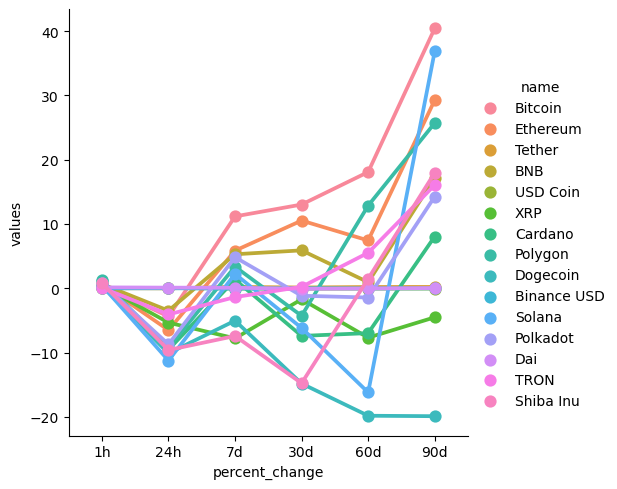

In [13]:
#Drawing the graph

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [15]:
#Filtering the data

df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,24445.002,2023-03-15 21:36:07.835756


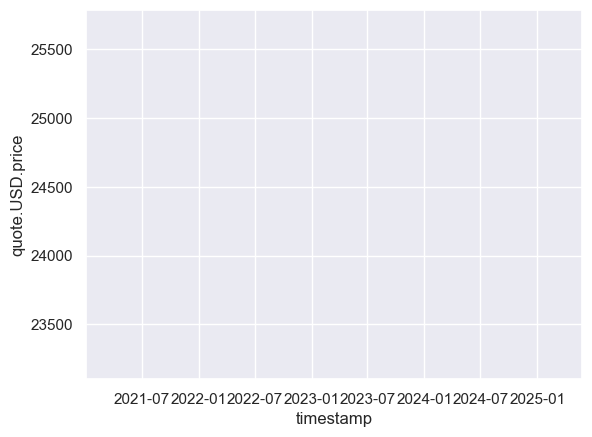

In [16]:
#Filtering the data

sns.set_theme(style='darkgrid') #setting a theme to increse the readability

sns.lineplot(x='timestamp',y='quote.USD.price',data= df8)
plt.show()